## Scale-Free Networks and their power-law

In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [41]:
plt.rcParams.update({'font.size': 16})

#### Generate a network with preferential attachment (Barabási-Albert model) and show its growth over time

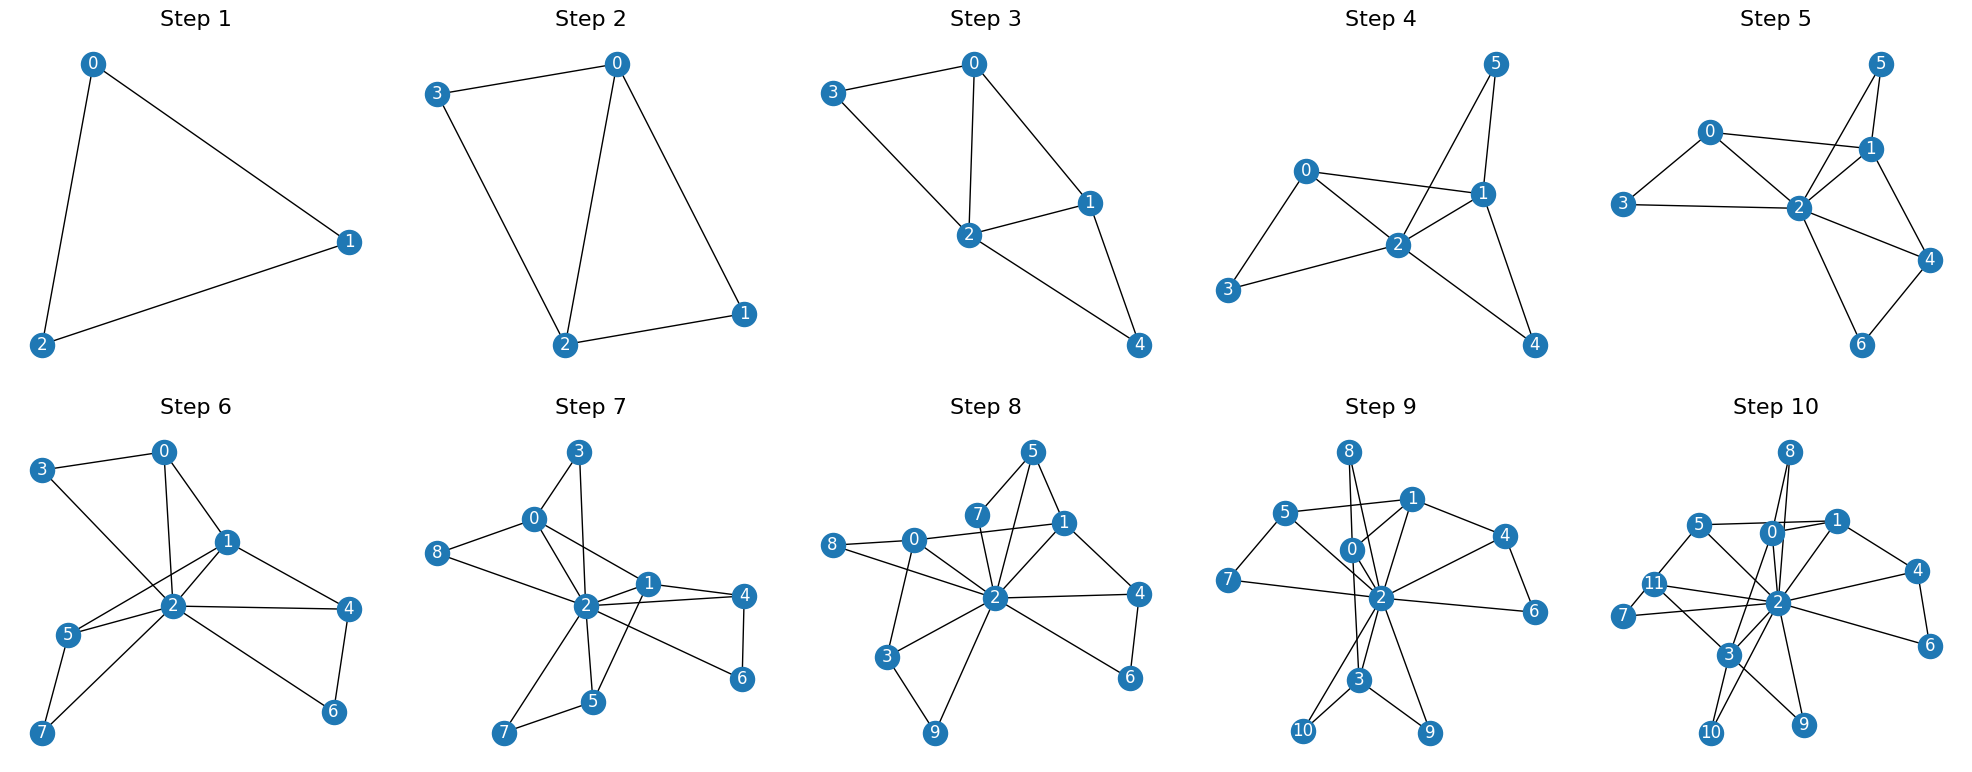

In [42]:
def add_node_with_preferential_attachment(G, m):
    """
    Adds a new node to graph G and connects it to m existing nodes.
    The probability of connecting to an existing node is proportional to its degree.
    (Barabási-Albert model)
    """
    new_node = len(G.nodes())
    degrees = dict(G.degree())
    # Create a weighted list where each node appears as many times as its degree.
    weighted_nodes = [node for node, deg in degrees.items() for _ in range(deg)]
    
    # Ensure we select m unique nodes to attach to.
    targets = set()
    while len(targets) < m:
        targets.add(random.choice(weighted_nodes))
    
    # Add the new node and create edges.
    G.add_node(new_node)
    for target in targets:
        G.add_edge(new_node, target)

# Initialize the graph with 2 connected nodes.
G = nx.Graph()
G.add_edge(0, 1)

# Settings: number of steps and number of edges per new node.
num_steps = 10
m = 2  # Each new node connects with 2 edge

# Create a grid of subplots: 2 rows x 5 columns = 10 plots.
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Build the network incrementally and plot at each step.
for step in range(num_steps):
    add_node_with_preferential_attachment(G, m)
    pos = nx.spring_layout(G, seed=42)  # Use fixed seed for layout consistency
    ax = axes[step]
    nx.draw(G, pos, ax=ax, node_size=300, with_labels=True, font_color='white')
    ax.set_title(f"Step {step + 1}", fontsize=16)

plt.tight_layout()
plt.show()

### Degree distribution of scale-free networks

In [47]:
# --- Step 1: Generate the Scale-Free Network ---
n_nodes = 5_000  # Total number of nodes in the graph
m_edges = 2     # Each new node attaches to m existing nodes
G = nx.barabasi_albert_graph(n_nodes, m_edges)

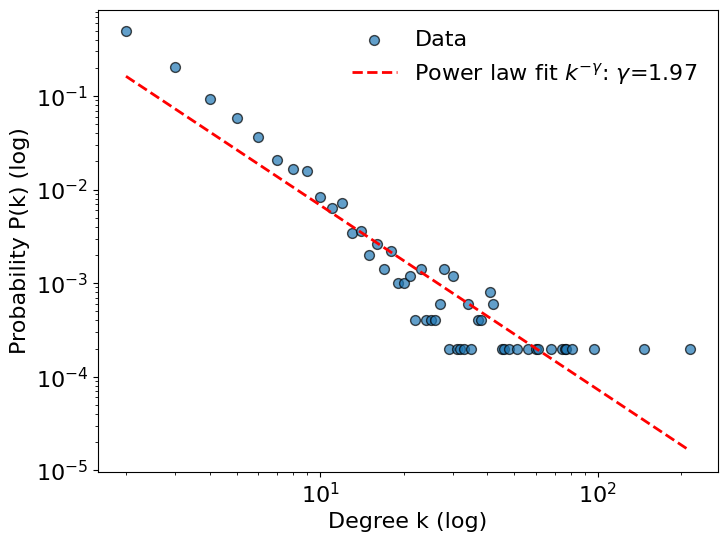

In [55]:
# --- Step 2: Compute the Degree Distribution ---
# Get the degree of each node
degree_sequence = [d for _, d in G.degree()]
# Find the unique degrees and their counts
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)
# Calculate P(k): probability that a node has degree k
P_k = counts / np.sum(counts)

# --- Step 3: Fit a Power Law in Log-Log Space ---
# Create a mask in case there are zero entries (usually not needed in BA networks)
mask = unique_degrees > 0
log_k = np.log10(unique_degrees[mask])
log_Pk = np.log10(P_k[mask])
# Perform a linear fit: log10(P(k)) = slope * log10(k) + intercept
slope, intercept = np.polyfit(log_k, log_Pk, 1)
# Compute the fitted P(k) for all unique degrees
fit_Pk = 10**intercept * unique_degrees**slope

label_fit = r'Power law fit $k^{-\gamma}$: $\gamma$' + f"={-slope:.2f}"

# --- Plot 1: Log-Log Scatter Plot with the Fit ---
plt.figure(figsize=(8, 6))
plt.scatter(unique_degrees, P_k, s=50, alpha=0.7, edgecolors='k', label='Data')
plt.plot(unique_degrees, fit_Pk, 'r--', linewidth=2,
         label=label_fit)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree k (log)')
plt.ylabel('Probability P(k) (log)')
plt.legend(frameon=False)
plt.show()

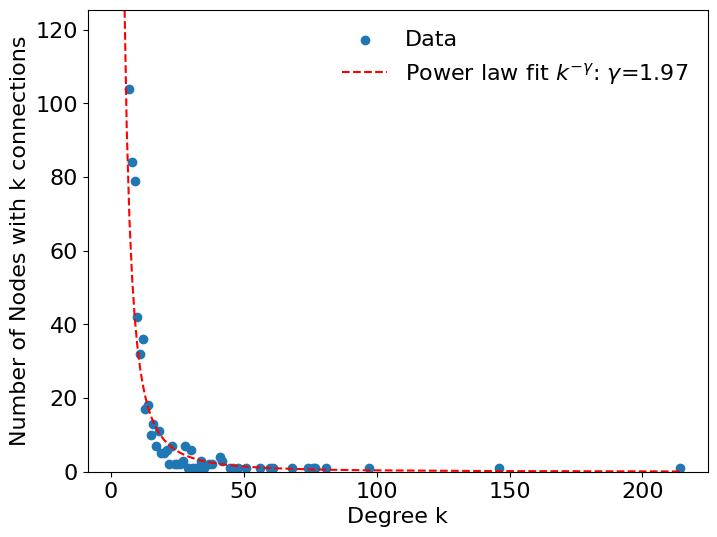

In [ ]:
# --- Plot 2: Linear Scale Function Plot with Power Law Fit ---
# Optionally, we can fit a power law to the data. For the fit, use logarithms:
mask = unique_degrees > 0  # Ensure we only consider valid degrees > 0
log_degrees = np.log10(unique_degrees[mask])
log_counts = np.log10(counts[mask])
slope, intercept = np.polyfit(log_degrees, log_counts, 1)
# Create the fitted curve: N(k) = 10^intercept * k^slope
fit_counts = 10**intercept * unique_degrees**slope

plt.figure(figsize=(8, 6))
# Plot the actual data as a function graph (line plot with markers)
plt.scatter(unique_degrees, counts, marker='o', label='Data')
# Overlay the fitted power law (dashed line)
plt.plot(unique_degrees, fit_counts, color='red', linestyle='--',
         label=r'Power law fit $k^{-\gamma}$: $\gamma$' + f"={-slope:.2f}")
plt.xlabel('Degree k')
plt.ylabel('Number of Nodes with k connections')
plt.ylim(0, 0.05 * max(counts)) # For better visibility of the power-law effect, limit the y-axis
plt.legend(frameon=False)
plt.show()